**Importing Libraries**

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [14]:
# loading the dataset 
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,2321280,60980025.60,426147.0,15305758.53,2018457.93,782997.60,274406.72,-45674267.07,-298.412307,0.183583,0.250996
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,2624608,60864659.52,480741.0,14457220.47,1684537.11,883315.98,579716.96,-46407439.05,-320.998349,0.183167,0.237531
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,2998512,54692858.88,561420.0,13614361.80,1383420.45,1031562.21,495120.88,-41078497.08,-301.729142,0.187233,0.248924
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,3226912,52179167.04,601236.0,13427918.64,1260150.03,1104728.40,1028128.28,-38751248.40,-288.587155,0.186319,0.257343
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,2209744,48371296.16,407514.0,12669322.86,1637334.84,748763.49,1028128.28,-35701973.30,-281.798591,0.184417,0.261918


**Exploratory Data Analysis**
1. Previously, we examined the various tables in the dataset to identify key variables, understand their realtionships, and determine which ones should be included in the final analysis.
2. In this phase of EDA, we will analyse the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anamolies, and ensure data quality before proceeding with further analysis.

In [8]:
#summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,1.875352e+04,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,1.266219e+04,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,1.092694e+02,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,1.482460e+02,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,6.643092e+02,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,5.025419e+04,1.775214e+05,16.00,576.000000,4192.000000,31612.000000,5.402560e+06
TotalPurchaseDollars,10692.0,4.817071e+05,1.969085e+06,11.36,7255.320000,58487.440000,331811.920000,6.098003e+07
TotalSalesQuantity,10692.0,9.232446e+03,3.285855e+04,0.00,99.000000,783.000000,5787.750000,1.004817e+06
TotalSalesDollars,10692.0,1.267172e+05,5.029658e+05,0.00,2187.660000,15894.135000,85190.745000,1.530576e+07
TotalSalesPrice,10692.0,5.638135e+04,1.348583e+05,0.00,869.130000,8573.400000,48178.687500,2.018458e+06


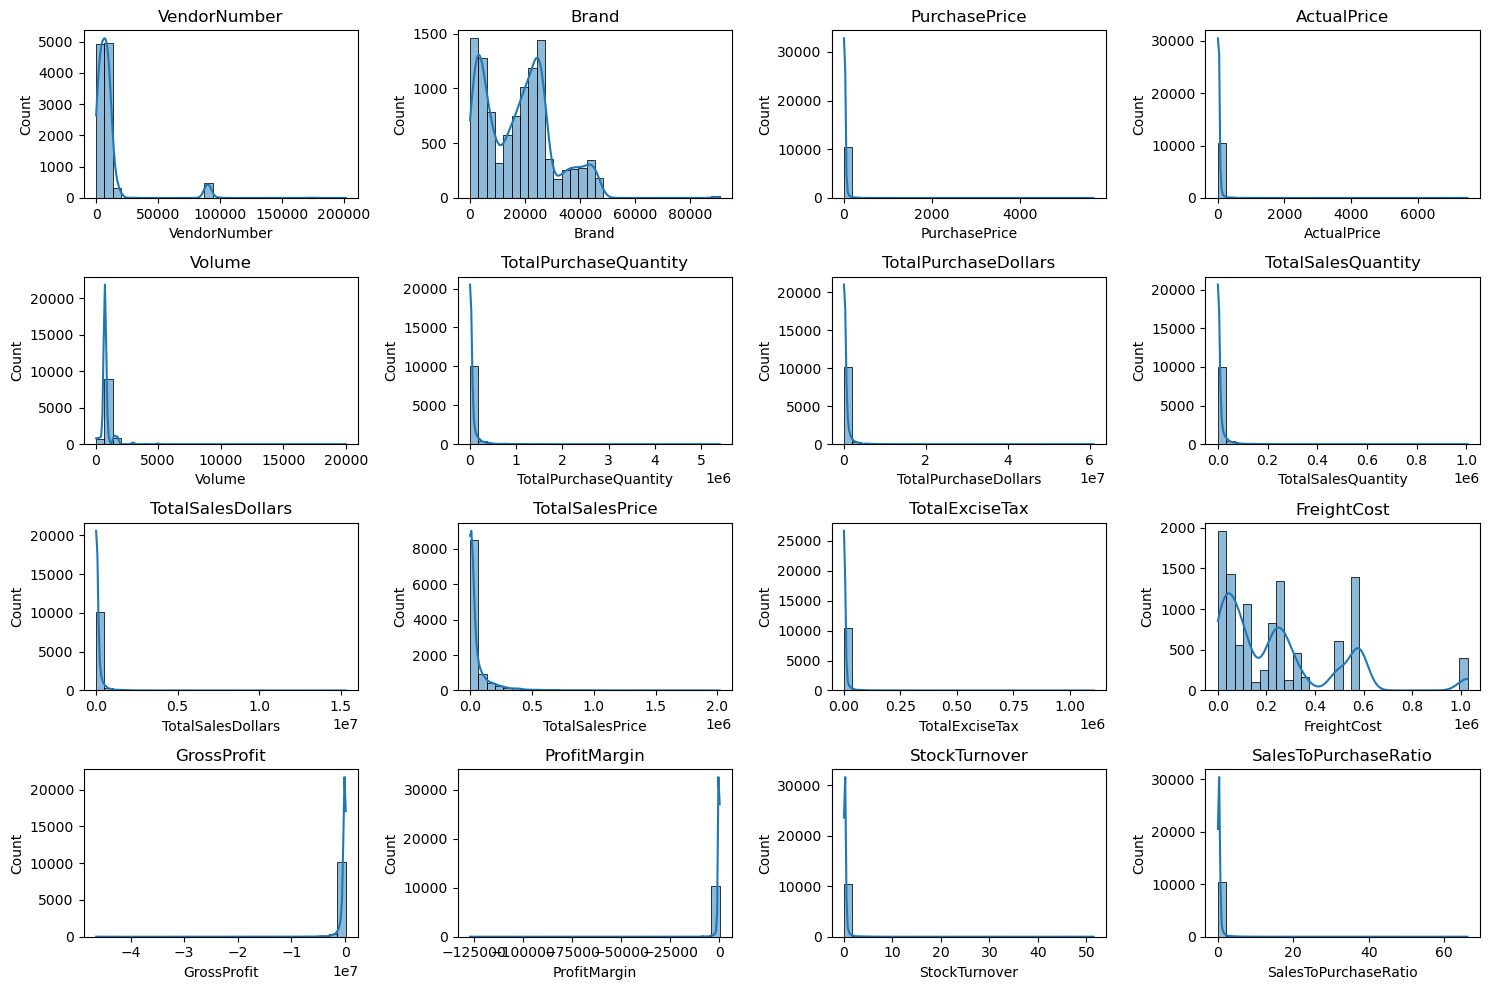

In [9]:
# distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns    #selecting all the numerical columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adjust grid layout as needed
    sns. histplot(df[col], kde=True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

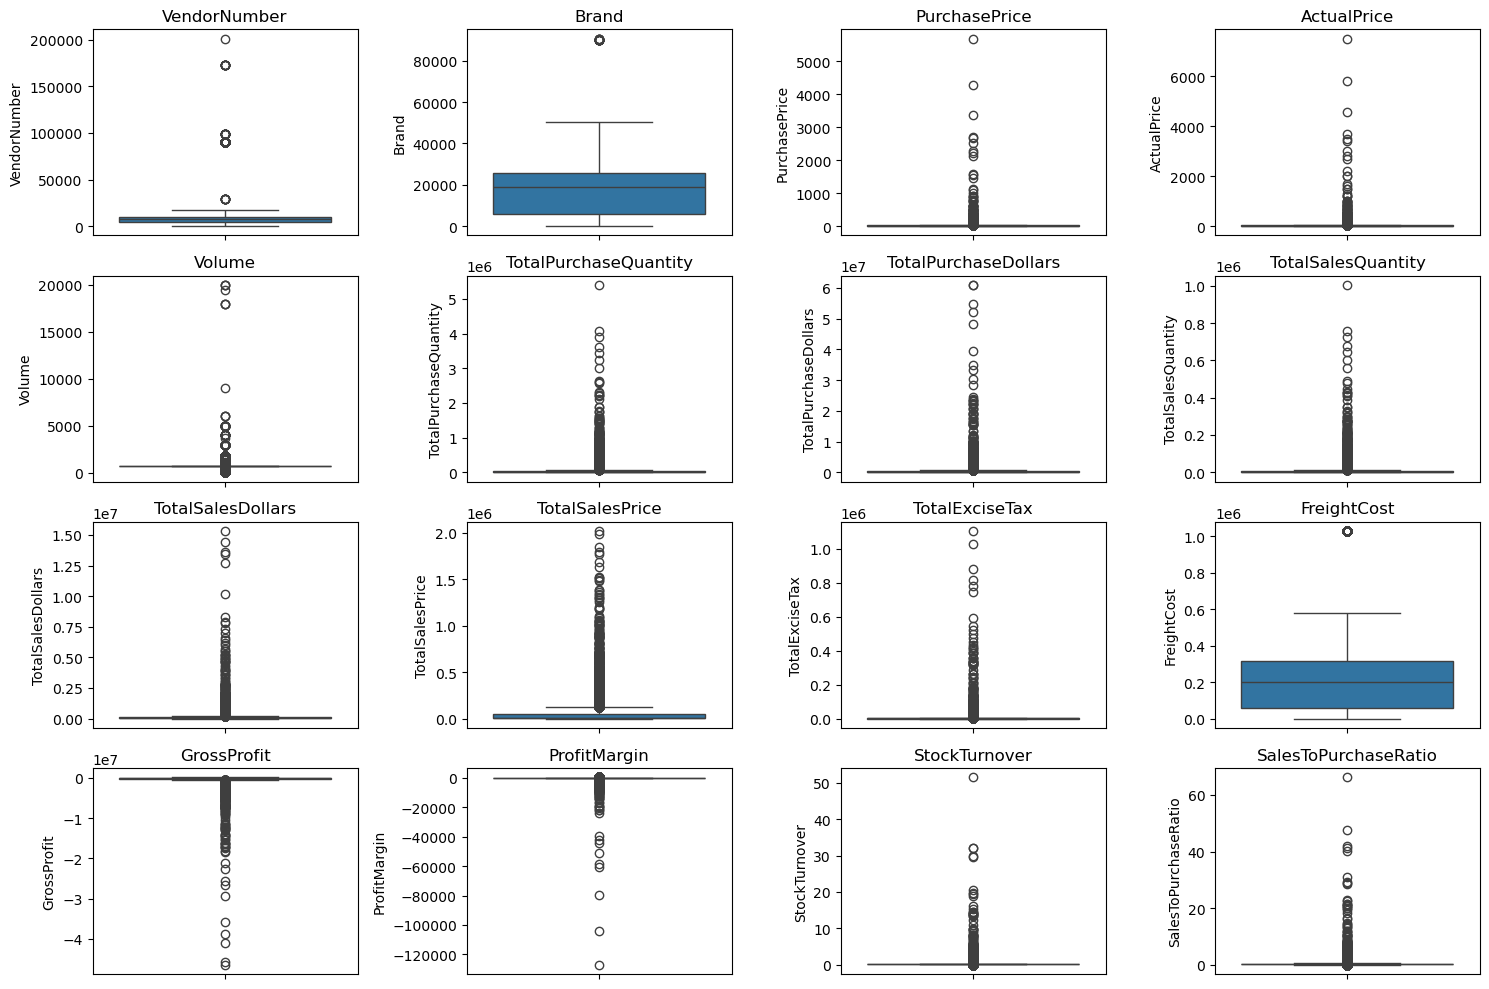

In [11]:
# outliers detection with boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adjust grid layout as needed
    sns. boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Summary Statistics Insights:**

*Negative & Zero Values:*

1.Gross Profit: Minimum value is-52,002.78, Indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price

2.Profit Margin: Has a minimum of, which suggests cases where revenue is zero or even lower than costs.

3.Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slave-moving or obsolete stock

*Outliers Indicated by High Standard Deviations:*

1.Purchase & Actual Prices. The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products

2.Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

3.Stock Tumover Ranges from 0 to 2745, implying some products sell extremely fast while others remain in stock indefinitaly Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled hom older stock.

In [ ]:
# outliers can be premium brands , so we will not remove all outliers 
# so we will remove outliers of only those which are inconsistent, like gross profit, profit margin- negative ones, total sales quantity =0 

In [16]:
#so let's filter out the data by removing inconsistencies 
df = pd.read_sql_query(
    """ SELECT * 
        FROM vendor_sales_summary
        WHERE GrossProfit >0
        AND ProfitMargin >0 
        AND TotalSalesQuantity > 0""",conn)

In [17]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,480,BACARDI USA INC,4881,Bacardi Twin Pack 2/750mls,14.81,19.99,750.0,13536,200468.16,10230.0,201761.70,75573.87,8059.89,357145.08,1293.54,0.641123,0.755762,1.006453
1,2555,DISARONNO INTERNATIONAL LLC,1212,DiSaronna Amaretto Sour VAP,14.38,21.99,750.0,9008,129535.04,7833.0,170825.67,87319.95,6170.25,23444.12,41290.63,24.171209,0.869560,1.318760
2,10754,PERFECTA WINES,10264,Fort Ross Pnt Nr Sonoma Cst,19.60,29.99,750.0,4272,83731.20,3732.0,111922.68,50383.20,415.71,114882.08,28191.48,25.188353,0.873596,1.336690
3,653,STATE WINE & SPIRITS,23256,Robert Hall Cab Svgn,9.39,13.99,750.0,7072,66406.08,5517.0,77182.83,29253.09,616.05,32059.92,10776.75,13.962626,0.780119,1.162286
4,1128,BROWN-FORMAN CORP,1722,Jack Daniels Sinatra Century,351.55,449.99,1000.0,176,61872.80,144.0,64798.56,58048.71,151.20,274406.72,2925.76,4.515162,0.818182,1.047287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,32,45.44,42.0,83.58,17.91,2.19,1028128.28,38.14,45.632927,1.312500,1.839349
665,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,32,42.24,15.0,47.85,32.88,1.65,108401.64,5.61,11.724138,0.468750,1.132812
666,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,96,37.44,402.0,196.98,4.41,21.12,201174.48,159.54,80.992994,4.187500,5.261218
667,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,16,23.52,216.0,429.84,232.83,45.36,1028128.28,406.32,94.528197,13.500000,18.275510


In [18]:
df.shape

(669, 18)

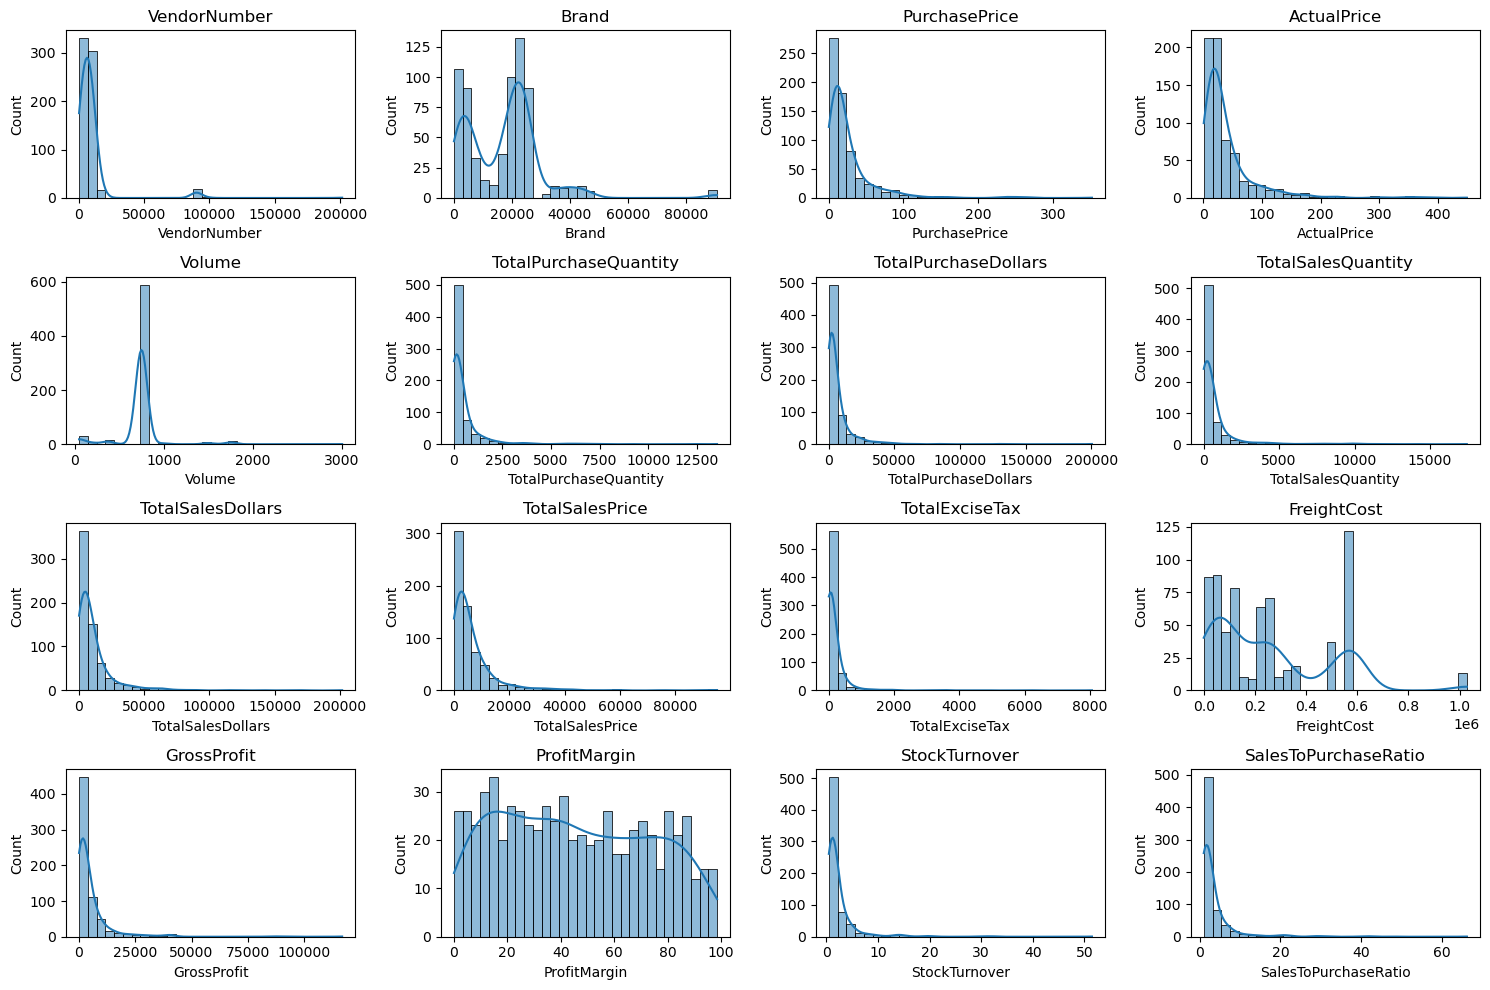

In [19]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adjust grid layout as needed
    sns. histplot(df[col], kde=True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

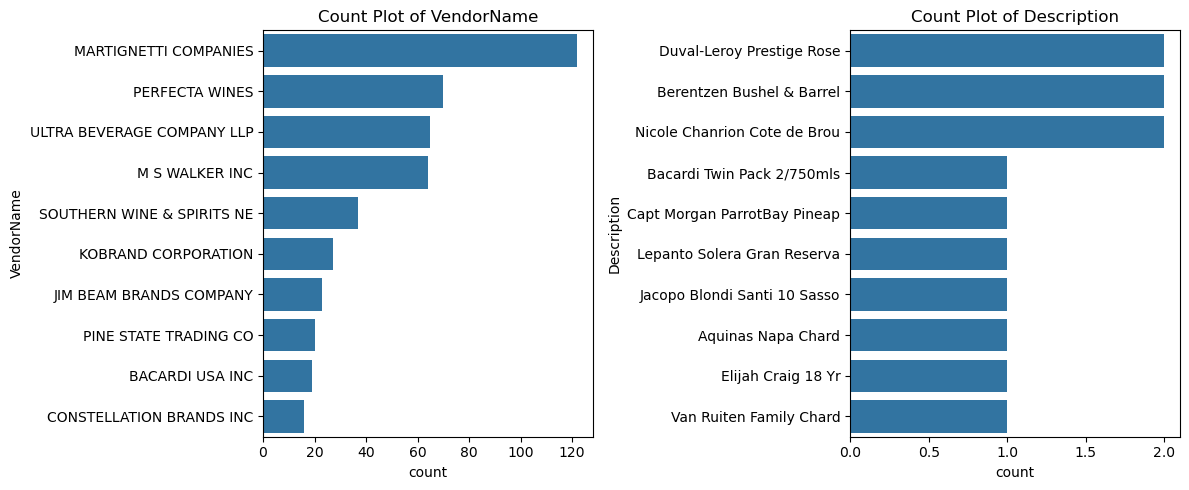

In [21]:
# count plots for categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

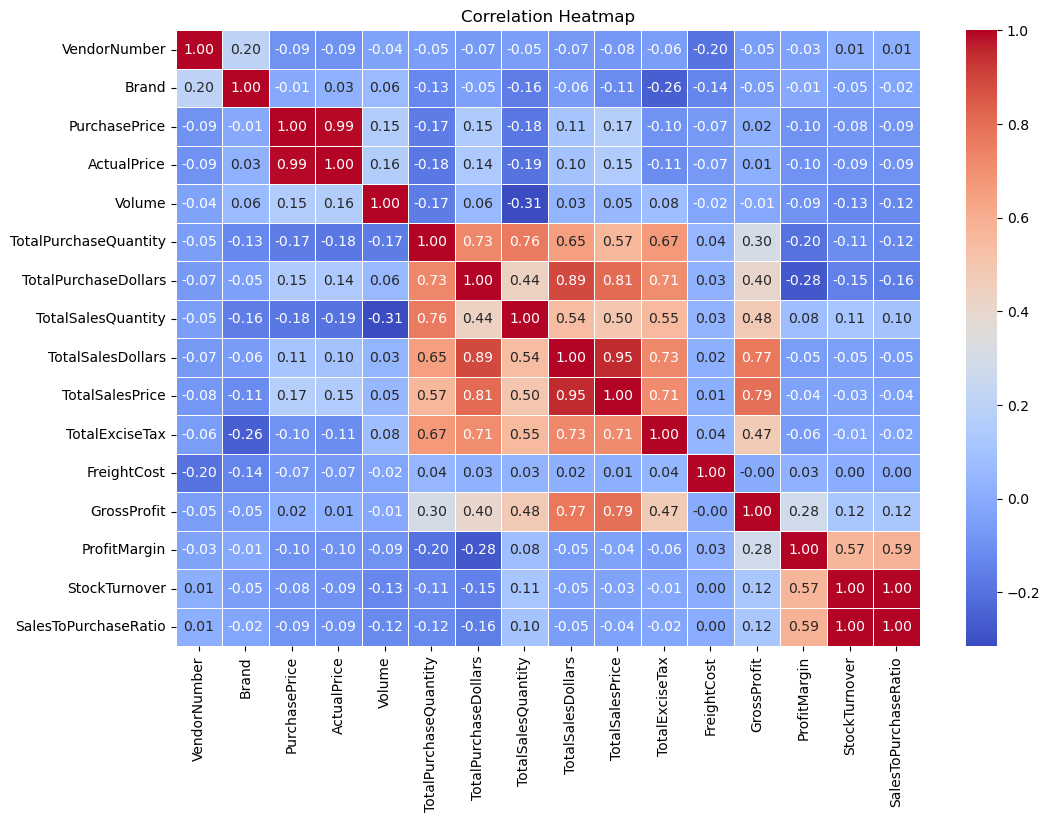

In [24]:
# Heat map is the best way to plot the correlation between any 2 numerical variables
# so correlation heatmap
# annot = true implies the values in boxes will appear to us , fmt=> formatting, color pallatte
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns. heatmap(correlation_matrix, annot = True, fmt=".2f",cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Correlation Insights**

**1.** Purchase Price has weak correlations with TotalSales Dollars (-0.012) and Gross Profit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

**2.** Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover

**3.** Negative correlation between profit margin & total sales price (-0.1/9) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

**4.** Stock Turnover has weak negative correlations with both Gross Profit (-0.038) and Profit Margin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

*********Data Analysis*************


**1.** Identify Brands that need Promotional or Pricing Adjustments which exhibit lower sales performance but highr profit margins

In [28]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index() # since the ProfitMargin is in % so the mean is meaningful

In [30]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,12 Days of Pearls Gift Set,929.07,87.617725
1,1800 Select Silver Tequila,6387.87,43.710814
2,20 Mile 09 Brdx Superior,5848.44,13.434694
3,4 Orange Vodka,1451.34,24.814310
4,A Bichot Ch Gris Nuits St Ge,1946.67,66.564441
...,...,...,...
661,Z-52 Znfdl Lodi Old Vines,5129.58,95.143462
662,Zardetto Pros di Coneg Brut,1037.58,40.045105
663,Zhenka Vodka 80 Proof,721.17,32.287810
664,Zinsane Znfdl Lodi,44368.47,91.368285


In [29]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [31]:
low_sales_threshold

1667.25

In [32]:
high_margin_threshold

80.53179377674624

In [33]:
# filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales but high profit margins:")
display(target_brands.sort_values('TotalSalesDollars'))
# so these brands require promotion and pricing adjustments 

Brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
267,Dr McGillicuddy's Apple Pie,196.98,80.992994
608,Three Olives Grape Vodka,255.42,95.552423
33,Aresti Pnt Nr Curico Vly,284.43,81.549063
600,The Club Strawbry Margarita,429.84,94.528197
481,Piehole Apple Pie,469.26,85.270426
515,Riunite Sweet White,485.19,86.479523
531,Sauza Sparkling Margarita,503.28,82.896201
251,DeKuyper Mixed Berry Medley,758.31,83.204758
642,Vigne A Porrona Rosso,818.37,83.068783
415,Mad Dogs & Englishmen Jumil,839.40,87.553014


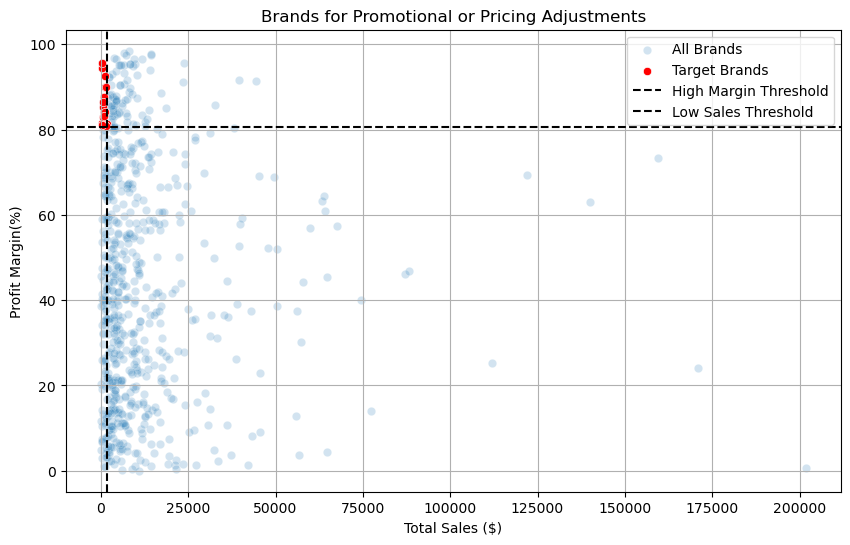

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = brand_performance, x='TotalSalesDollars', y='ProfitMargin', label = 'All Brands', alpha= 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color = 'red', label='Target Brands')
# Alpha value less implies it appears a bit light(the dot)

plt.axhline(high_margin_threshold, linestyle = '--',color='black',label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--',color ='black',label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin(%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# for better visualization
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

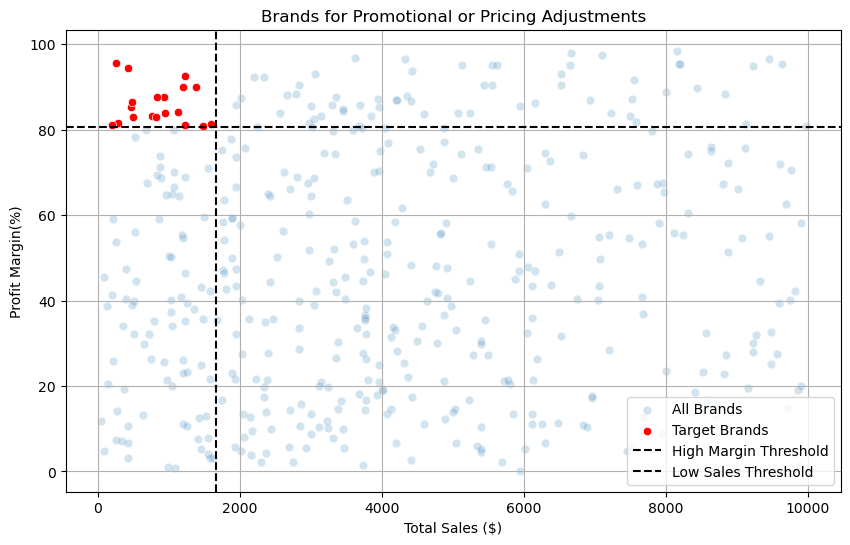

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = brand_performance, x='TotalSalesDollars', y='ProfitMargin', label = 'All Brands', alpha= 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color = 'red', label='Target Brands')
# Alpha value less implies it appears a bit light(the dot)

plt.axhline(high_margin_threshold, linestyle = '--',color='black',label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--',color ='black',label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin(%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()
# so then in dashboard we can even do the mouse hover to see the name of the brand

**2.** Which vendors and brands demonstrate the highest sales performance?

In [38]:
# Top vendors & brands by sales performance 
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)

top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

*But how come we can write like this in Python?*

Because Pandas DataFrames have built-in functions that mimic SQL operations (like groupby, sum, filter, nlargest, etc.).

That’s why it looks SQL-ish, but it’s all happening inside Python’s Pandas library, not an actual database.

👉 So:

1.If you see """ SQL CODE """ → that’s raw SQL.

2.If you see .groupby(), .sum(), .nlargest() → that’s Python Pandas.

In [39]:
top_vendors

VendorName
MARTIGNETTI COMPANIES          1476319.59
ULTRA BEVERAGE COMPANY LLP      966800.94
M S WALKER INC                  677901.96
BACARDI USA INC                 547922.16
PERFECTA WINES                  537688.74
SOUTHERN WINE & SPIRITS NE      423435.87
BROWN-FORMAN CORP               365208.69
STATE WINE & SPIRITS            217284.45
DISARONNO INTERNATIONAL LLC     185169.15
PERNOD RICARD USA               173913.69
Name: TotalSalesDollars, dtype: float64

In [40]:
top_brands

Description
Bacardi Twin Pack 2/750mls      201761.70
DiSaronna Amaretto Sour VAP     170825.67
Jack Daniels No 7 Black Trav    159348.33
Dewars Highlander Honey         140029.56
Saddleback Clrs 09 Cab Svgn     121947.90
Fort Ross Pnt Nr Sonoma Cst     111922.68
Nicholson Ranch Chard Son Ct     88308.09
Hirsch 20 Yr American Whisky     86982.84
Robert Hall Cab Svgn             77182.83
Absolut Spark Vodka              74400.06
Name: TotalSalesDollars, dtype: float64

In [43]:
# for better readability- we are adding K, M formatting for dollars 
def format_dollars(value):
    if value>= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [45]:
top_brands.apply(lambda x : format_dollars(x))

Description
Bacardi Twin Pack 2/750mls      201.76K
DiSaronna Amaretto Sour VAP     170.83K
Jack Daniels No 7 Black Trav    159.35K
Dewars Highlander Honey         140.03K
Saddleback Clrs 09 Cab Svgn     121.95K
Fort Ross Pnt Nr Sonoma Cst     111.92K
Nicholson Ranch Chard Son Ct     88.31K
Hirsch 20 Yr American Whisky     86.98K
Robert Hall Cab Svgn             77.18K
Absolut Spark Vodka              74.40K
Name: TotalSalesDollars, dtype: object

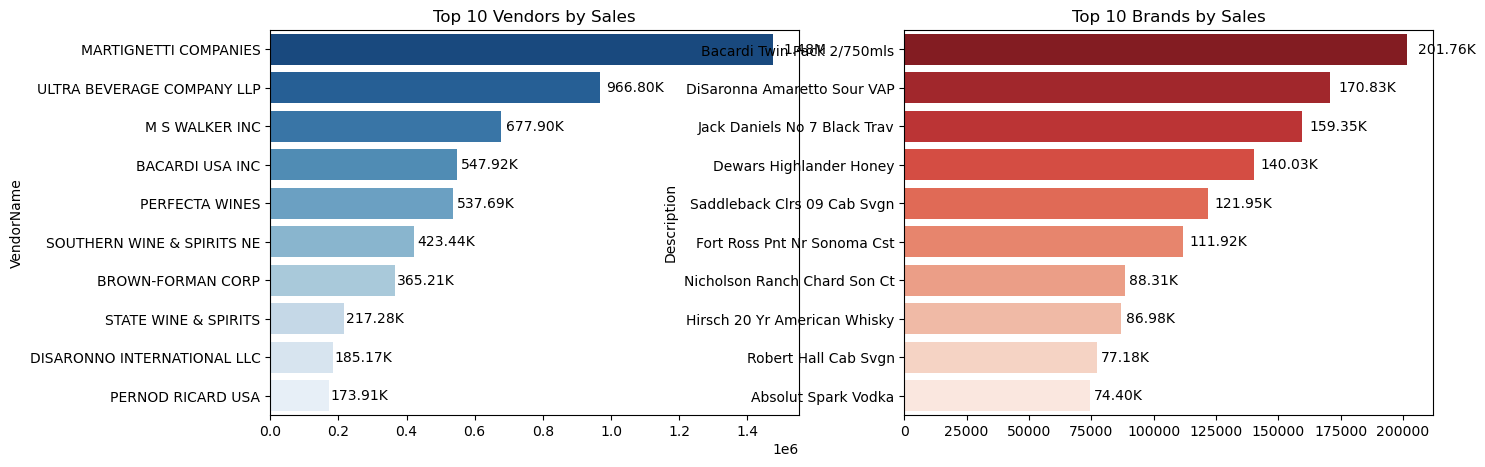

In [55]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors 
plt.subplot(1, 2, 1) 
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette = "Blues_r") 
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()),  
             ha='left', va='center', fontsize=10, color="black")   
# to get value after the bar ends 

# Plot for top Brands 
plt.subplot(1, 2, 2)
ax2=sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r") 
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width()*0.02), 
             bar.get_y()+ bar.get_height() / 2,
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color="black")

**3.** Which Vendors contribute the most to total purchase dollars?

In [62]:
df.groupby("VendorName")[["TotalPurchaseDollars",'GrossProfit','TotalSalesDollars']].sum().reset_index()

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ALISA CARR BEVERAGES,95571.84,31234.20,126806.04
1,ATLANTIC IMPORTING COMPANY,10257.28,1109.03,11366.31
2,BACARDI USA INC,340460.80,207461.36,547922.16
3,BANFI PRODUCTS CORP,9198.88,5243.48,14442.36
4,BROWN-FORMAN CORP,174000.80,191207.89,365208.69
...,...,...,...,...
57,VINILANDIA USA,30530.72,47681.41,78212.13
58,VRANKEN AMERICA,2883.04,5495.15,8378.19
59,WESTERN SPIRITS BEVERAGE CO,3047.04,1930.47,4977.51
60,WILLIAM GRANT & SONS INC,38309.44,15360.14,53669.58


In [64]:
# another way of writing , here other columns can be done with other aggregated functions like mean(), count(), etc.
vendor_performance = df.groupby('VendorName').agg({
    "TotalPurchaseDollars":'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
    

In [77]:
vendor_performance['Purchase_Contribution%'] = (vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum())*100

In [78]:
vendor_performance = round(vendor_performance.sort_values('Purchase_Contribution%', ascending = False),2)

In [79]:
# applying format_dollar function to above 3 columns 
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Purchase_Contribution%
29,MARTIGNETTI COMPANIES,881.01K,595.31K,1.48M,19.93,19.93
55,ULTRA BEVERAGE COMPANY LLP,571.00K,395.80K,966.80K,12.91,12.91
2,BACARDI USA INC,340.46K,207.46K,547.92K,7.70,7.70
36,PERFECTA WINES,310.12K,227.57K,537.69K,7.01,7.01
27,M S WALKER INC,308.98K,368.92K,677.90K,6.99,6.99
47,SOUTHERN WINE & SPIRITS NE,182.04K,241.39K,423.44K,4.12,4.12
4,BROWN-FORMAN CORP,174.00K,191.21K,365.21K,3.94,3.94
48,STATE WINE & SPIRITS,143.49K,73.79K,217.28K,3.25,3.25
12,DISARONNO INTERNATIONAL LLC,129.88K,55.29K,185.17K,2.94,2.94
37,PERNOD RICARD USA,108.92K,65.00K,173.91K,2.46,2.46


In [74]:
vendor_performance.shape

(62, 5)

In [80]:
top_vendors['Purchase_Contribution%'].sum()

71.24999999999999

In [86]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Purchase_Contribution%,Cummulative_Contribution%,Cumulative_Contribution%
29,MARTIGNETTI COMPANIES,881.01K,595.31K,1.48M,19.93,19.93,19.93,19.93
55,ULTRA BEVERAGE COMPANY LLP,571.00K,395.80K,966.80K,12.91,12.91,32.84,32.84
2,BACARDI USA INC,340.46K,207.46K,547.92K,7.70,7.70,40.54,40.54
36,PERFECTA WINES,310.12K,227.57K,537.69K,7.01,7.01,47.55,47.55
27,M S WALKER INC,308.98K,368.92K,677.90K,6.99,6.99,54.54,54.54
47,SOUTHERN WINE & SPIRITS NE,182.04K,241.39K,423.44K,4.12,4.12,58.66,58.66
4,BROWN-FORMAN CORP,174.00K,191.21K,365.21K,3.94,3.94,62.60,62.60
48,STATE WINE & SPIRITS,143.49K,73.79K,217.28K,3.25,3.25,65.85,65.85
12,DISARONNO INTERNATIONAL LLC,129.88K,55.29K,185.17K,2.94,2.94,68.79,68.79
37,PERNOD RICARD USA,108.92K,65.00K,173.91K,2.46,2.46,71.25,71.25


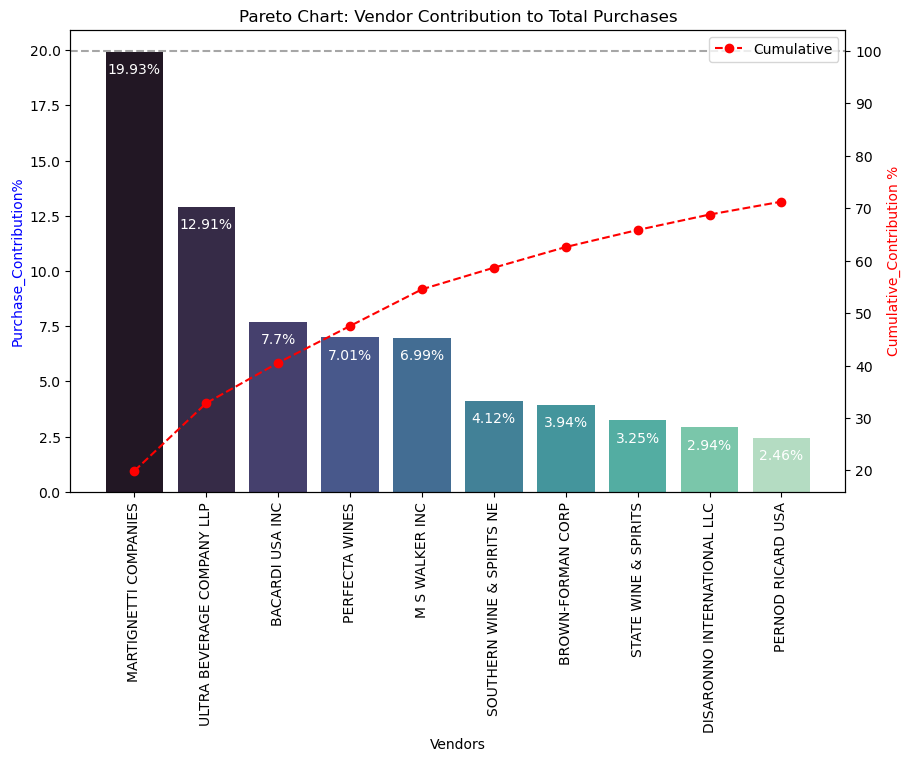

In [90]:
# pareto chart

fig, ax1= plt.subplots(figsize=(10, 6))
#Bar plot for Purchase Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')
    
#Line Plot for Cumulative Contributions
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase_Contribution%', color='blue')
ax2.set_ylabel('Cumulative_Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline( y = 100, color='gray', linestyle='dashed', alpha=0.7)
ax2. legend (loc='upper right')

plt.show()

**4.** How much of total procurement is dependent on top vendors?

In [91]:
print(f"Total Purchase Contibution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)}%")


Total Purchase Contibution of top 10 vendors is 71.25%


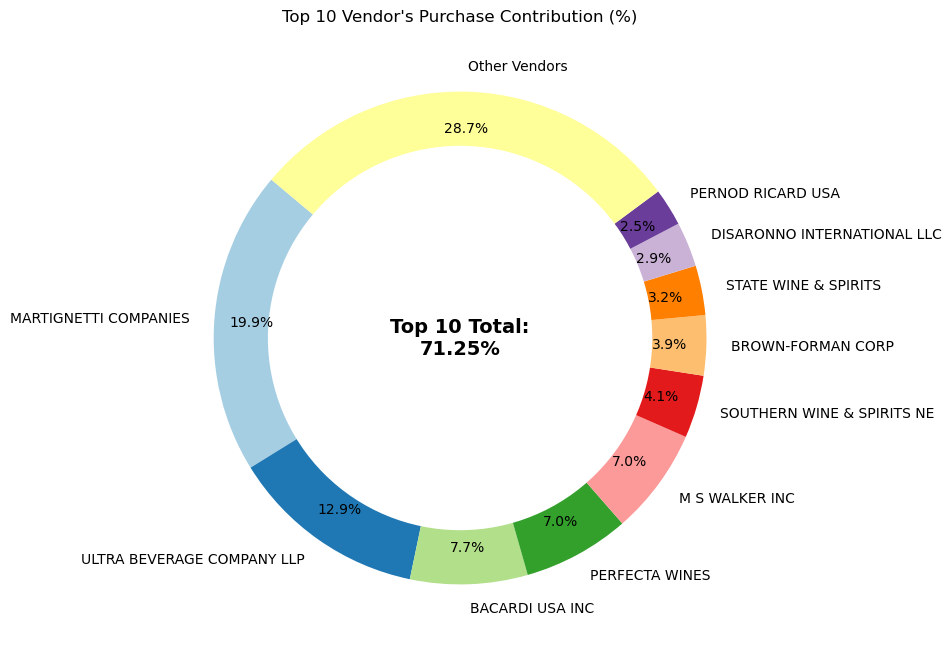

In [97]:
vendors =list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors["Purchase_Contribution%"].values)
total_contribution=sum(purchase_contributions)
remaining_contribution=100- total_contribution
                      
# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)
                      
#Donut Chart
fig, ax= plt.subplots (figsize=(8, 8))
wedges, texts, autotexts = ax.pie (purchase_contributions, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)
                      
#Draw a white circle in the center to create a "donut" effect
centre_circle= plt.Circle((0, 0), 0.78, fc='white')
fig.gca().add_artist(centre_circle)
                      
#Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')
                      
plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()
                    
                      

**5.** Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [98]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [105]:
# bucketise
df ["OrderSize"] = pd.qcut(df ["TotalPurchaseQuantity"], q = 3, labels = ["Small", "Medium", "Large"])


In [104]:
df[ ["OrderSize", "TotalPurchaseQuantity"]]

,OrderSize,TotalPurchaseQuantity
0,Large,13536
1,Large,9008
2,Large,4272
3,Large,7072
4,Medium,176
...,...,...
664,Small,32
665,Small,32
666,Medium,96
667,Small,16


In [107]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,37.902423
Medium,28.452227
Large,13.319189


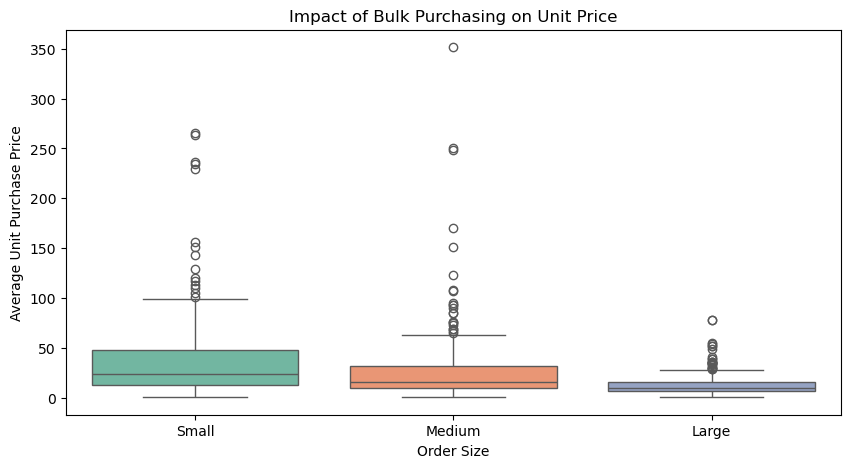

In [109]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

1. Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
2. The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
3. This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

**6.** Which vendors have low inventory turnover , indicating excess stock and slow moving products?

In [112]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
WINE GROUP INC,0.468750
PROXIMO SPIRITS INC.,0.679861
THE PIERPONT GROUP LLC,0.721154
BROWN-FORMAN CORP,0.735109
KLIN SPIRITS LLC,0.735577
BACARDI USA INC,0.739187
R.P.IMPORTS INC,0.743750
ATLANTIC IMPORTING COMPANY,0.743952
BANFI PRODUCTS CORP,0.750000


**7** How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it ?

In [115]:
df ["UnsoldInventoryValue"] = (df[ "TotalPurchaseQuantity"]- df ["TotalSalesQuantity"])*df ["PurchasePrice"] 
print('Total Unsold Capital:', format_dollars(df ["UnsoldInventoryValue"].sum()))


Total Unsold Capital: -936540.19


In [118]:
#Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby ("VendorName") ["UnsoldInventoryValue"].sum().reset_index()
# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor= inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']= inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
0,ALISA CARR BEVERAGES,11.77K
12,DISARONNO INTERNATIONAL LLC,6.28K
52,THE PIERPONT GROUP LLC,5.84K
33,NICHE W & S,3.72K
32,MOET HENNESSY USA INC,3.59K
41,R.P.IMPORTS INC,3.20K
1,ATLANTIC IMPORTING COMPANY,2.63K
11,DIAGEO NORTH AMERICA INC,2.24K
43,Russian Standard Vodka,1.30K
39,POVERTY LANE ORCHARDS,952.24


**8.** What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [121]:
top_threshold = df ["TotalSalesDollars"].quantile(0.75)
low_threshold= df ["TotalSalesDollars"].quantile(0.25)

In [123]:
top_vendors= df [df ["TotalSalesDollars"]>= top_threshold] ["ProfitMargin"].dropna()
low_vendors = df [df ["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()

In [124]:
top_vendors

0       0.641123
1      24.171209
2      25.188353
3      13.962626
4       4.515162
         ...    
401    88.495058
485    95.645673
513    93.972120
597    97.515874
600    97.617315
Name: ProfitMargin, Length: 168, dtype: float64

In [129]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err= np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical =stats.t.ppf((1+ confidence) / 2, df=len(data)- 1)
    margin_of_error = t_critical + std_err
    return mean_val, mean_val ,margin_of_error, mean_val + margin_of_error

In [136]:
top_mean, top_lower, top_upper= confidence_interval(top_vendors)
low_mean, low_lower, low_upper =confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper: .2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

#Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper:{top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean: 2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="-", label=f"Low Upper: {low_upper:.2f}") 
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

#Finalize Plot
plt.title("Confidence Interval Comparision: Top vs. Low Vendors(profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

ValueError: too many values to unpack (expected 3)